<a href="https://colab.research.google.com/github/NeuTRONz3R0/Machine-Learning/blob/main/blank_Space_Detection_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yolo V8s

In [ ]:
#checking if GPU is alloted or not
!nvidia-smi

Fri Mar 17 18:39:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# setting Working DIR
import os
root_dir = "/content/drive/My Drive/"
working = "/content/drive/MyDrive/Colab/YOLOv8/"
os.chdir(working)

In [ ]:
#installing ultralytics/ YOLOv8
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

In [ ]:
#importing libs
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aRd3YKd4FYOBNIDrrwqj")
project = rf.workspace("ujjwal-deep-ejtnl").project("detection_idk_what")
dataset = project.version(3).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to DETECTION_IDK_WHAT-3 in yolov5pytorch:: 100%|██████████| 1148/1148 [00:07<00:00, 154.34it/s]


In [ ]:
%cd {working}

/content/drive/MyDrive/Colab/YOLOv8


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/Colab/YOLOv8/datasets/DETECTION_IDK_WHAT-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

In [ ]:
!ls {working}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1679078571.9cc772177bf7.1933.0  train_batch510.jpg
F1_curve.png					    train_batch511.jpg
P_curve.png					    train_batch512.jpg
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    val_batch1_labels.jpg
results.png					    val_batch1_pred.jpg
train_batch0.jpg				    weights


/content/drive/MyDrive/Colab/YOLOv8


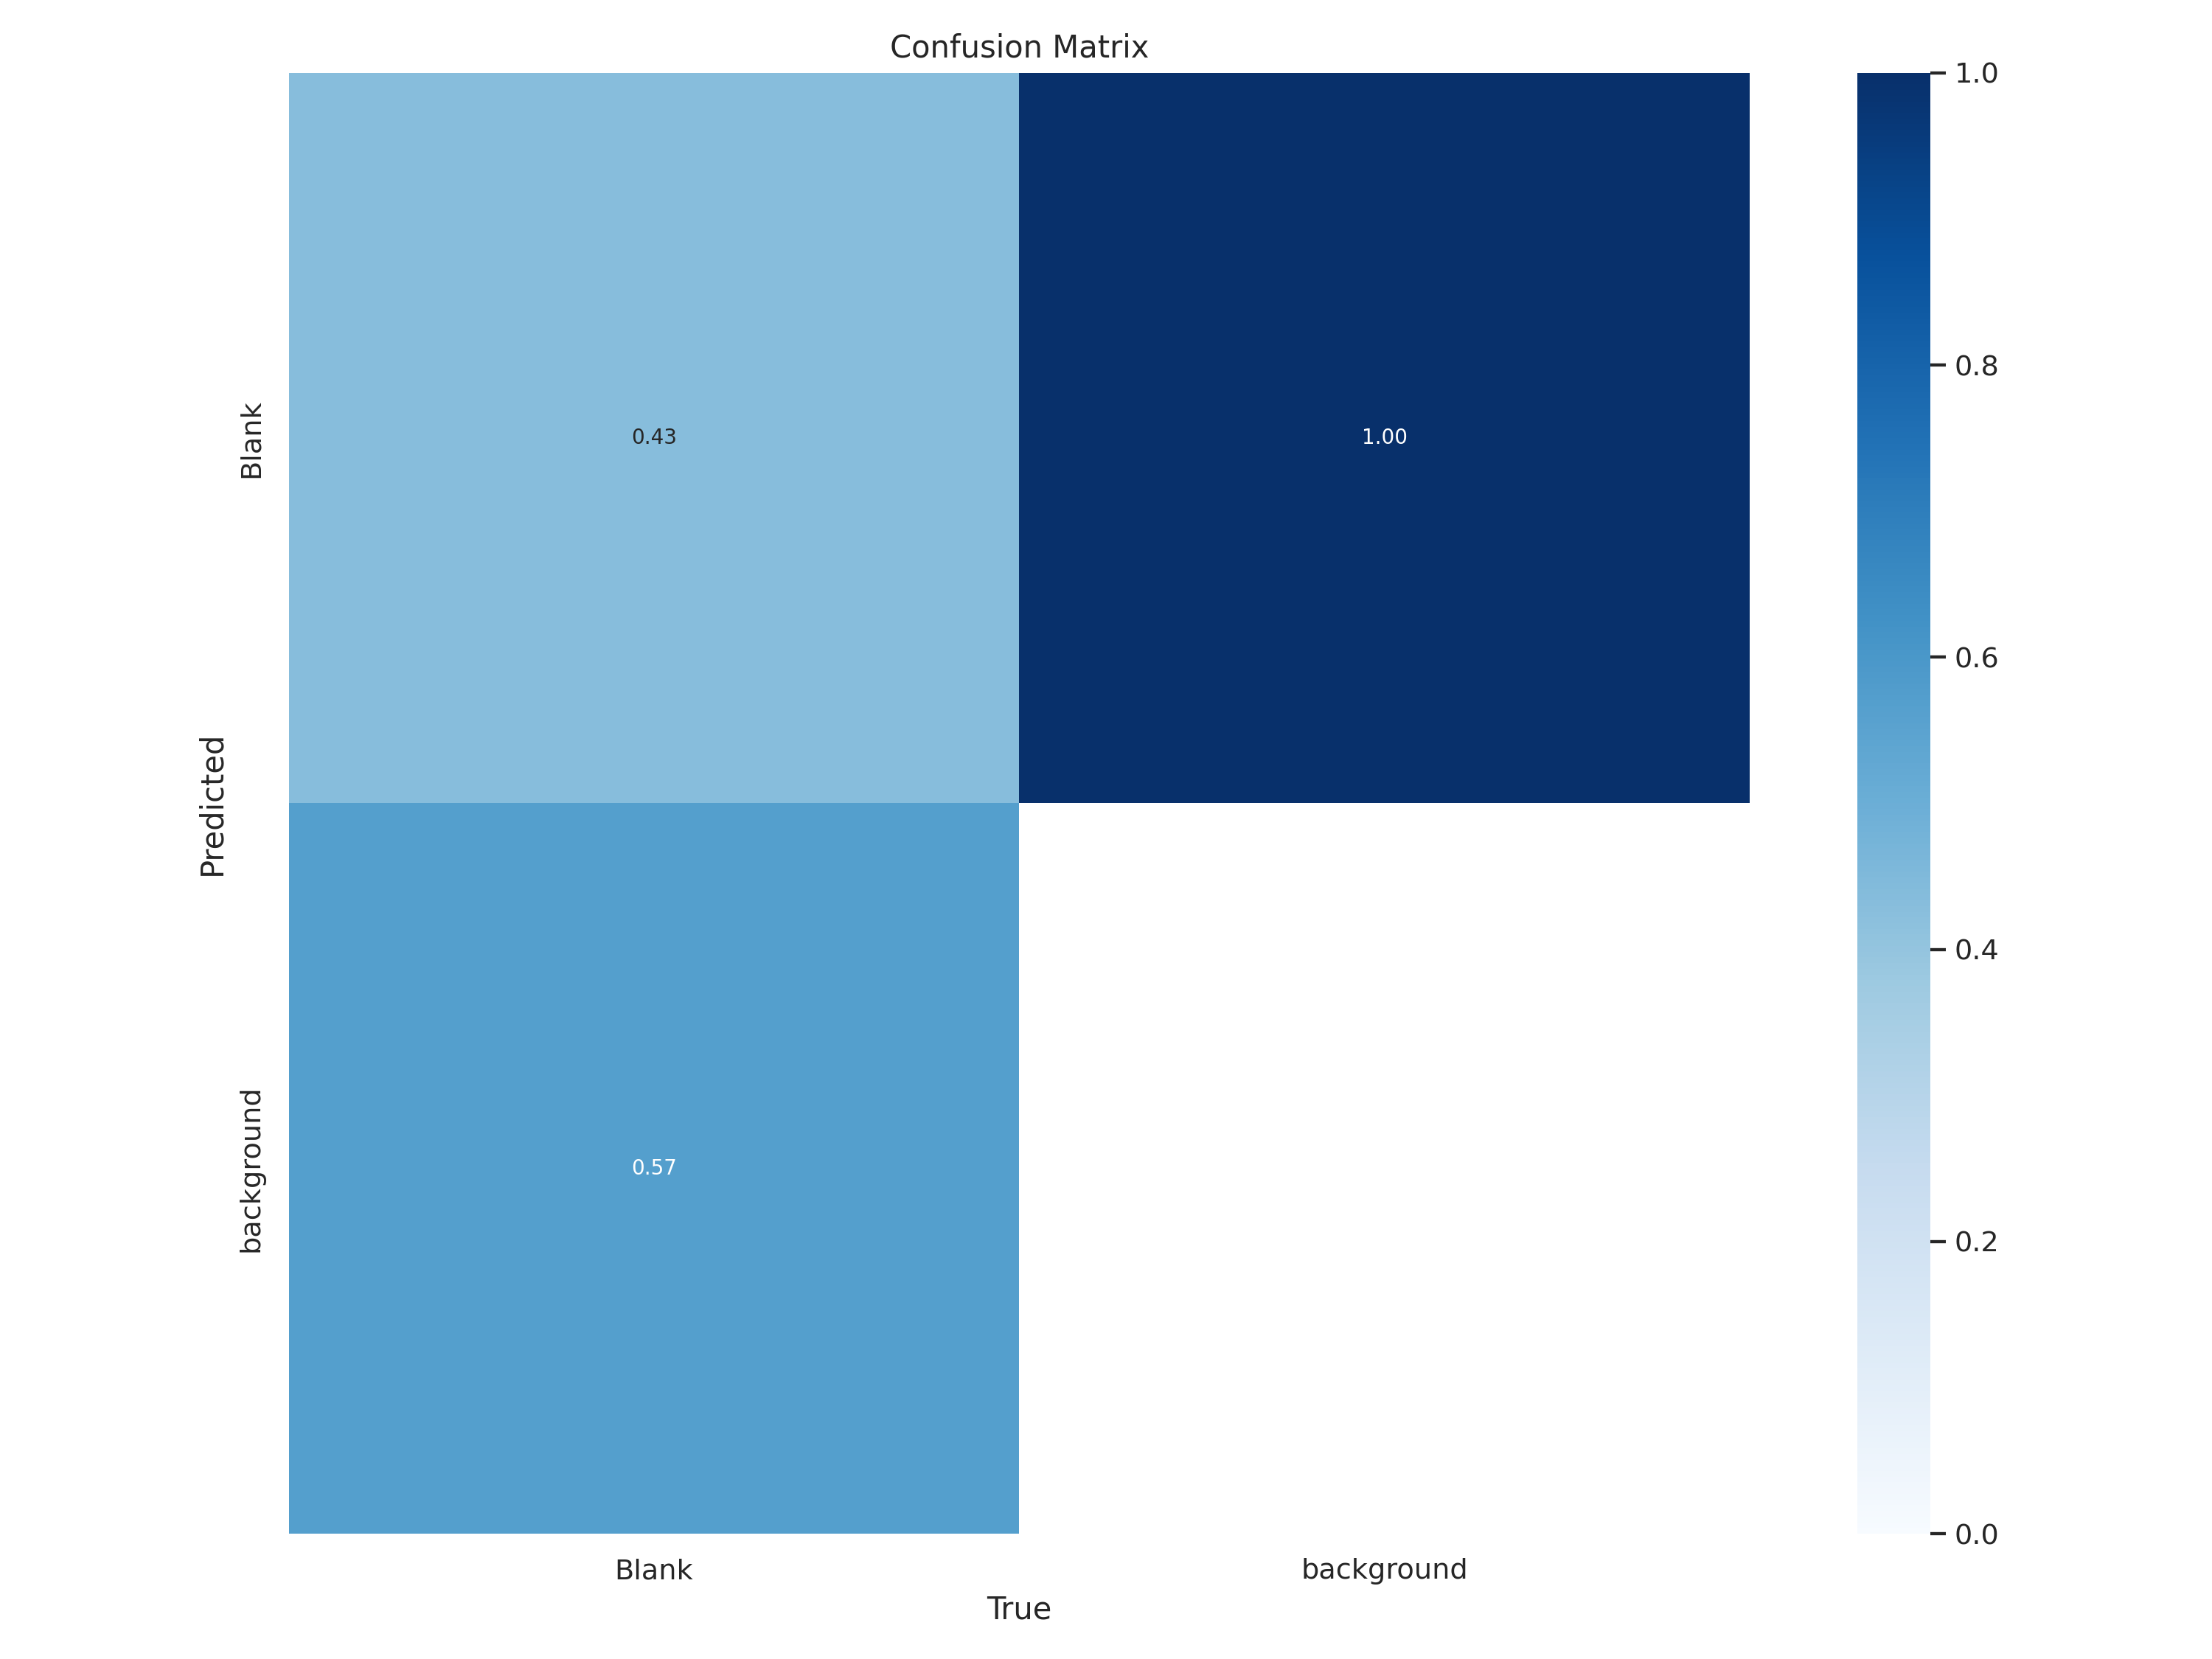

In [ ]:
from IPython.display import Image
%cd {working}
#Image(filename=f'{working}/runs/detect/train/confusion_matrix.png', width=600)
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/datasets/runs/detect/train/confusion_matrix.png',width=600)

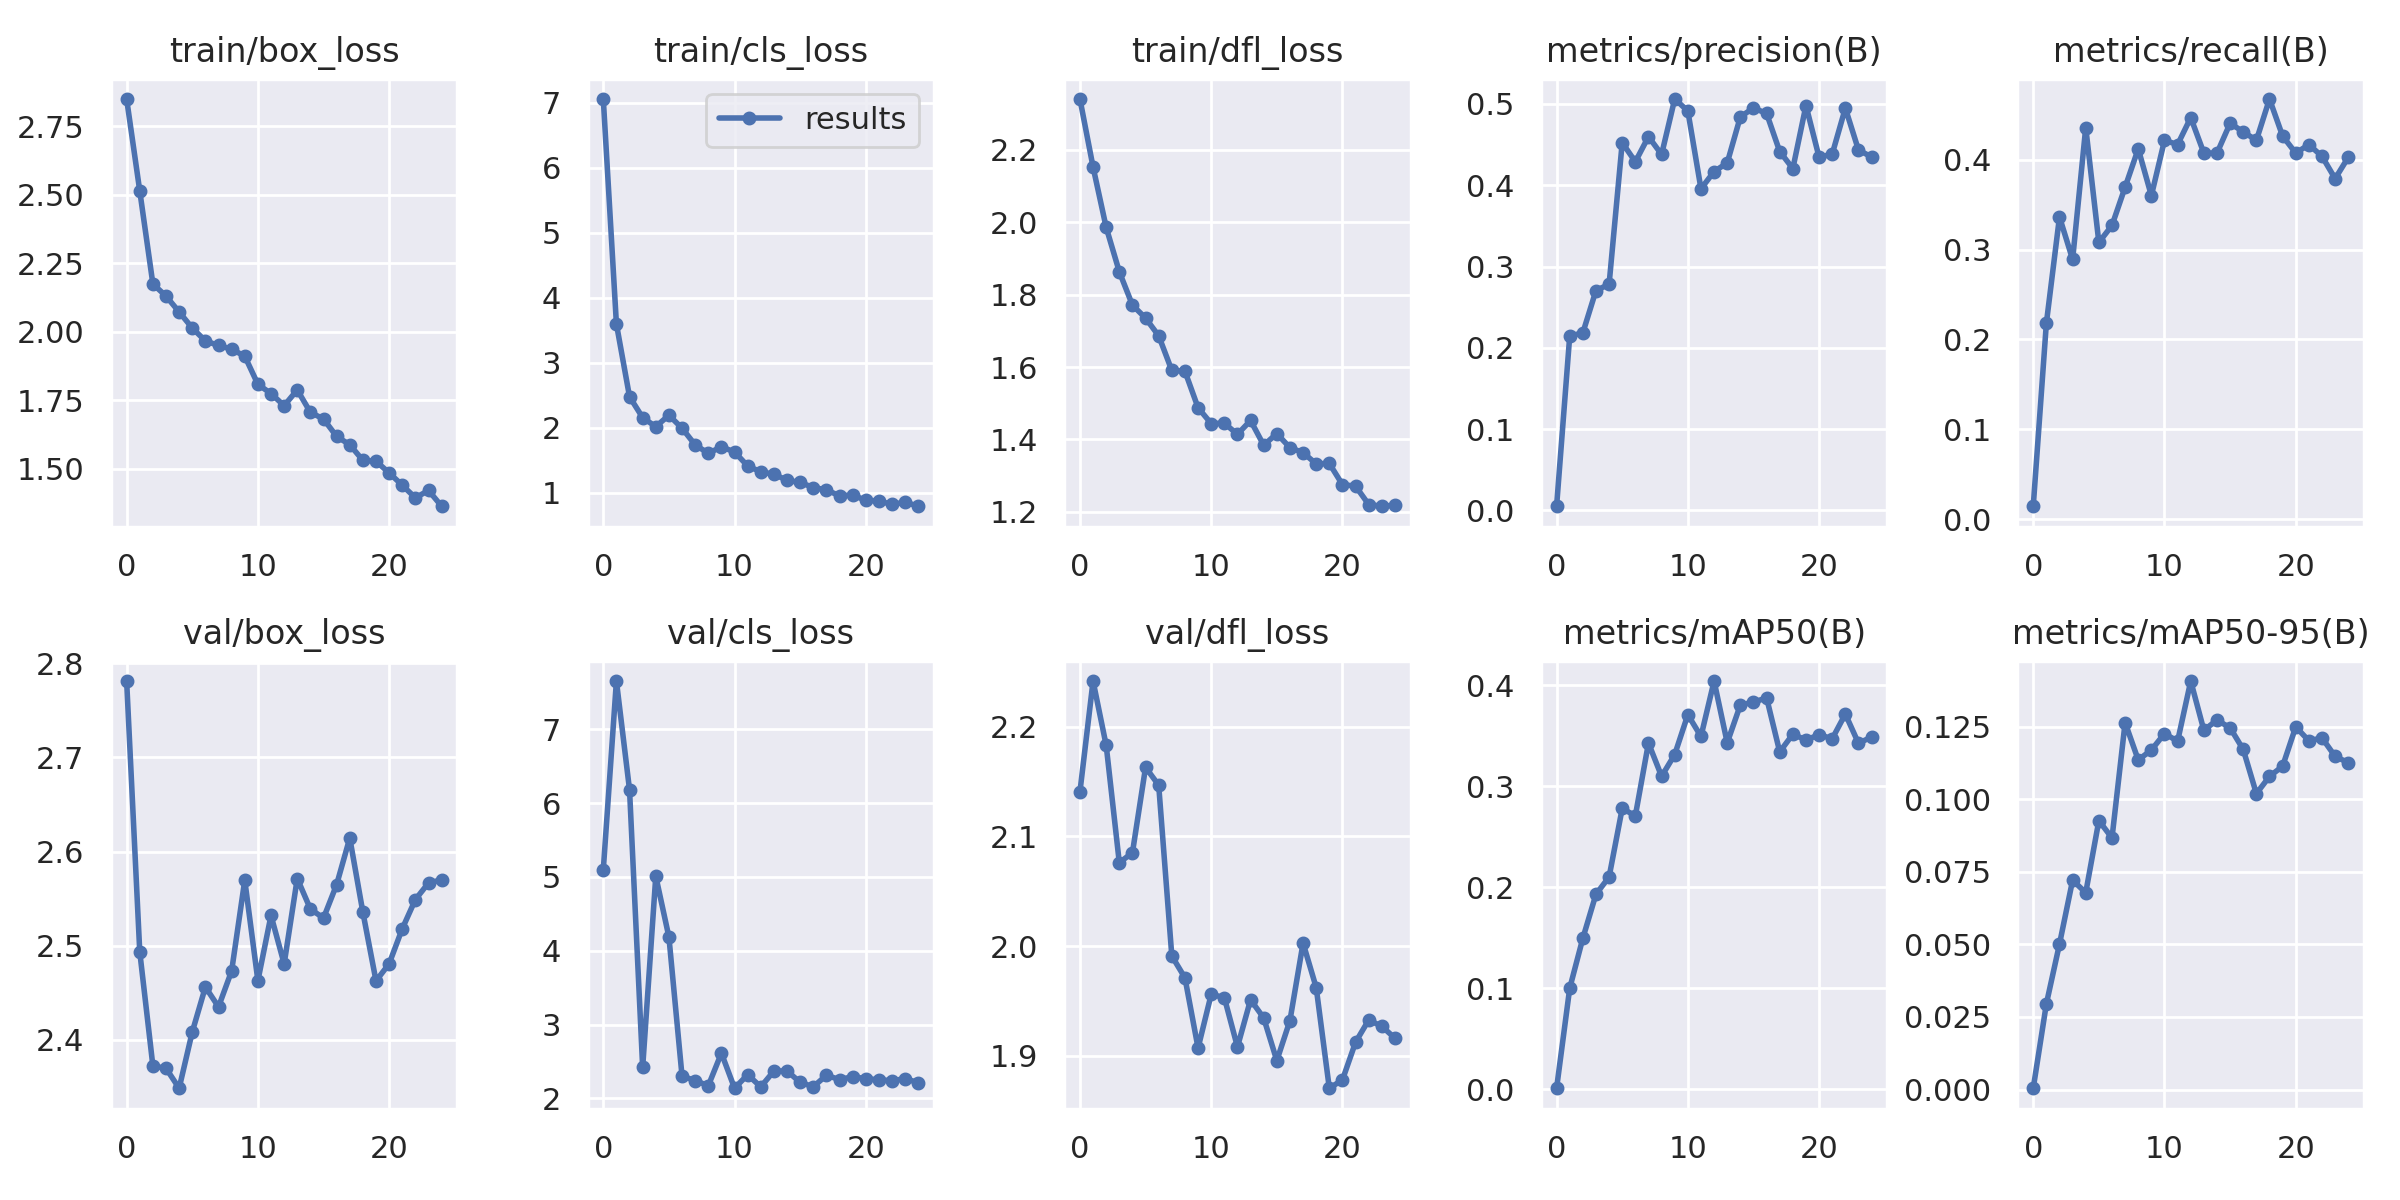

In [ ]:
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/datasets/runs/detect/train/results.png',width=600)

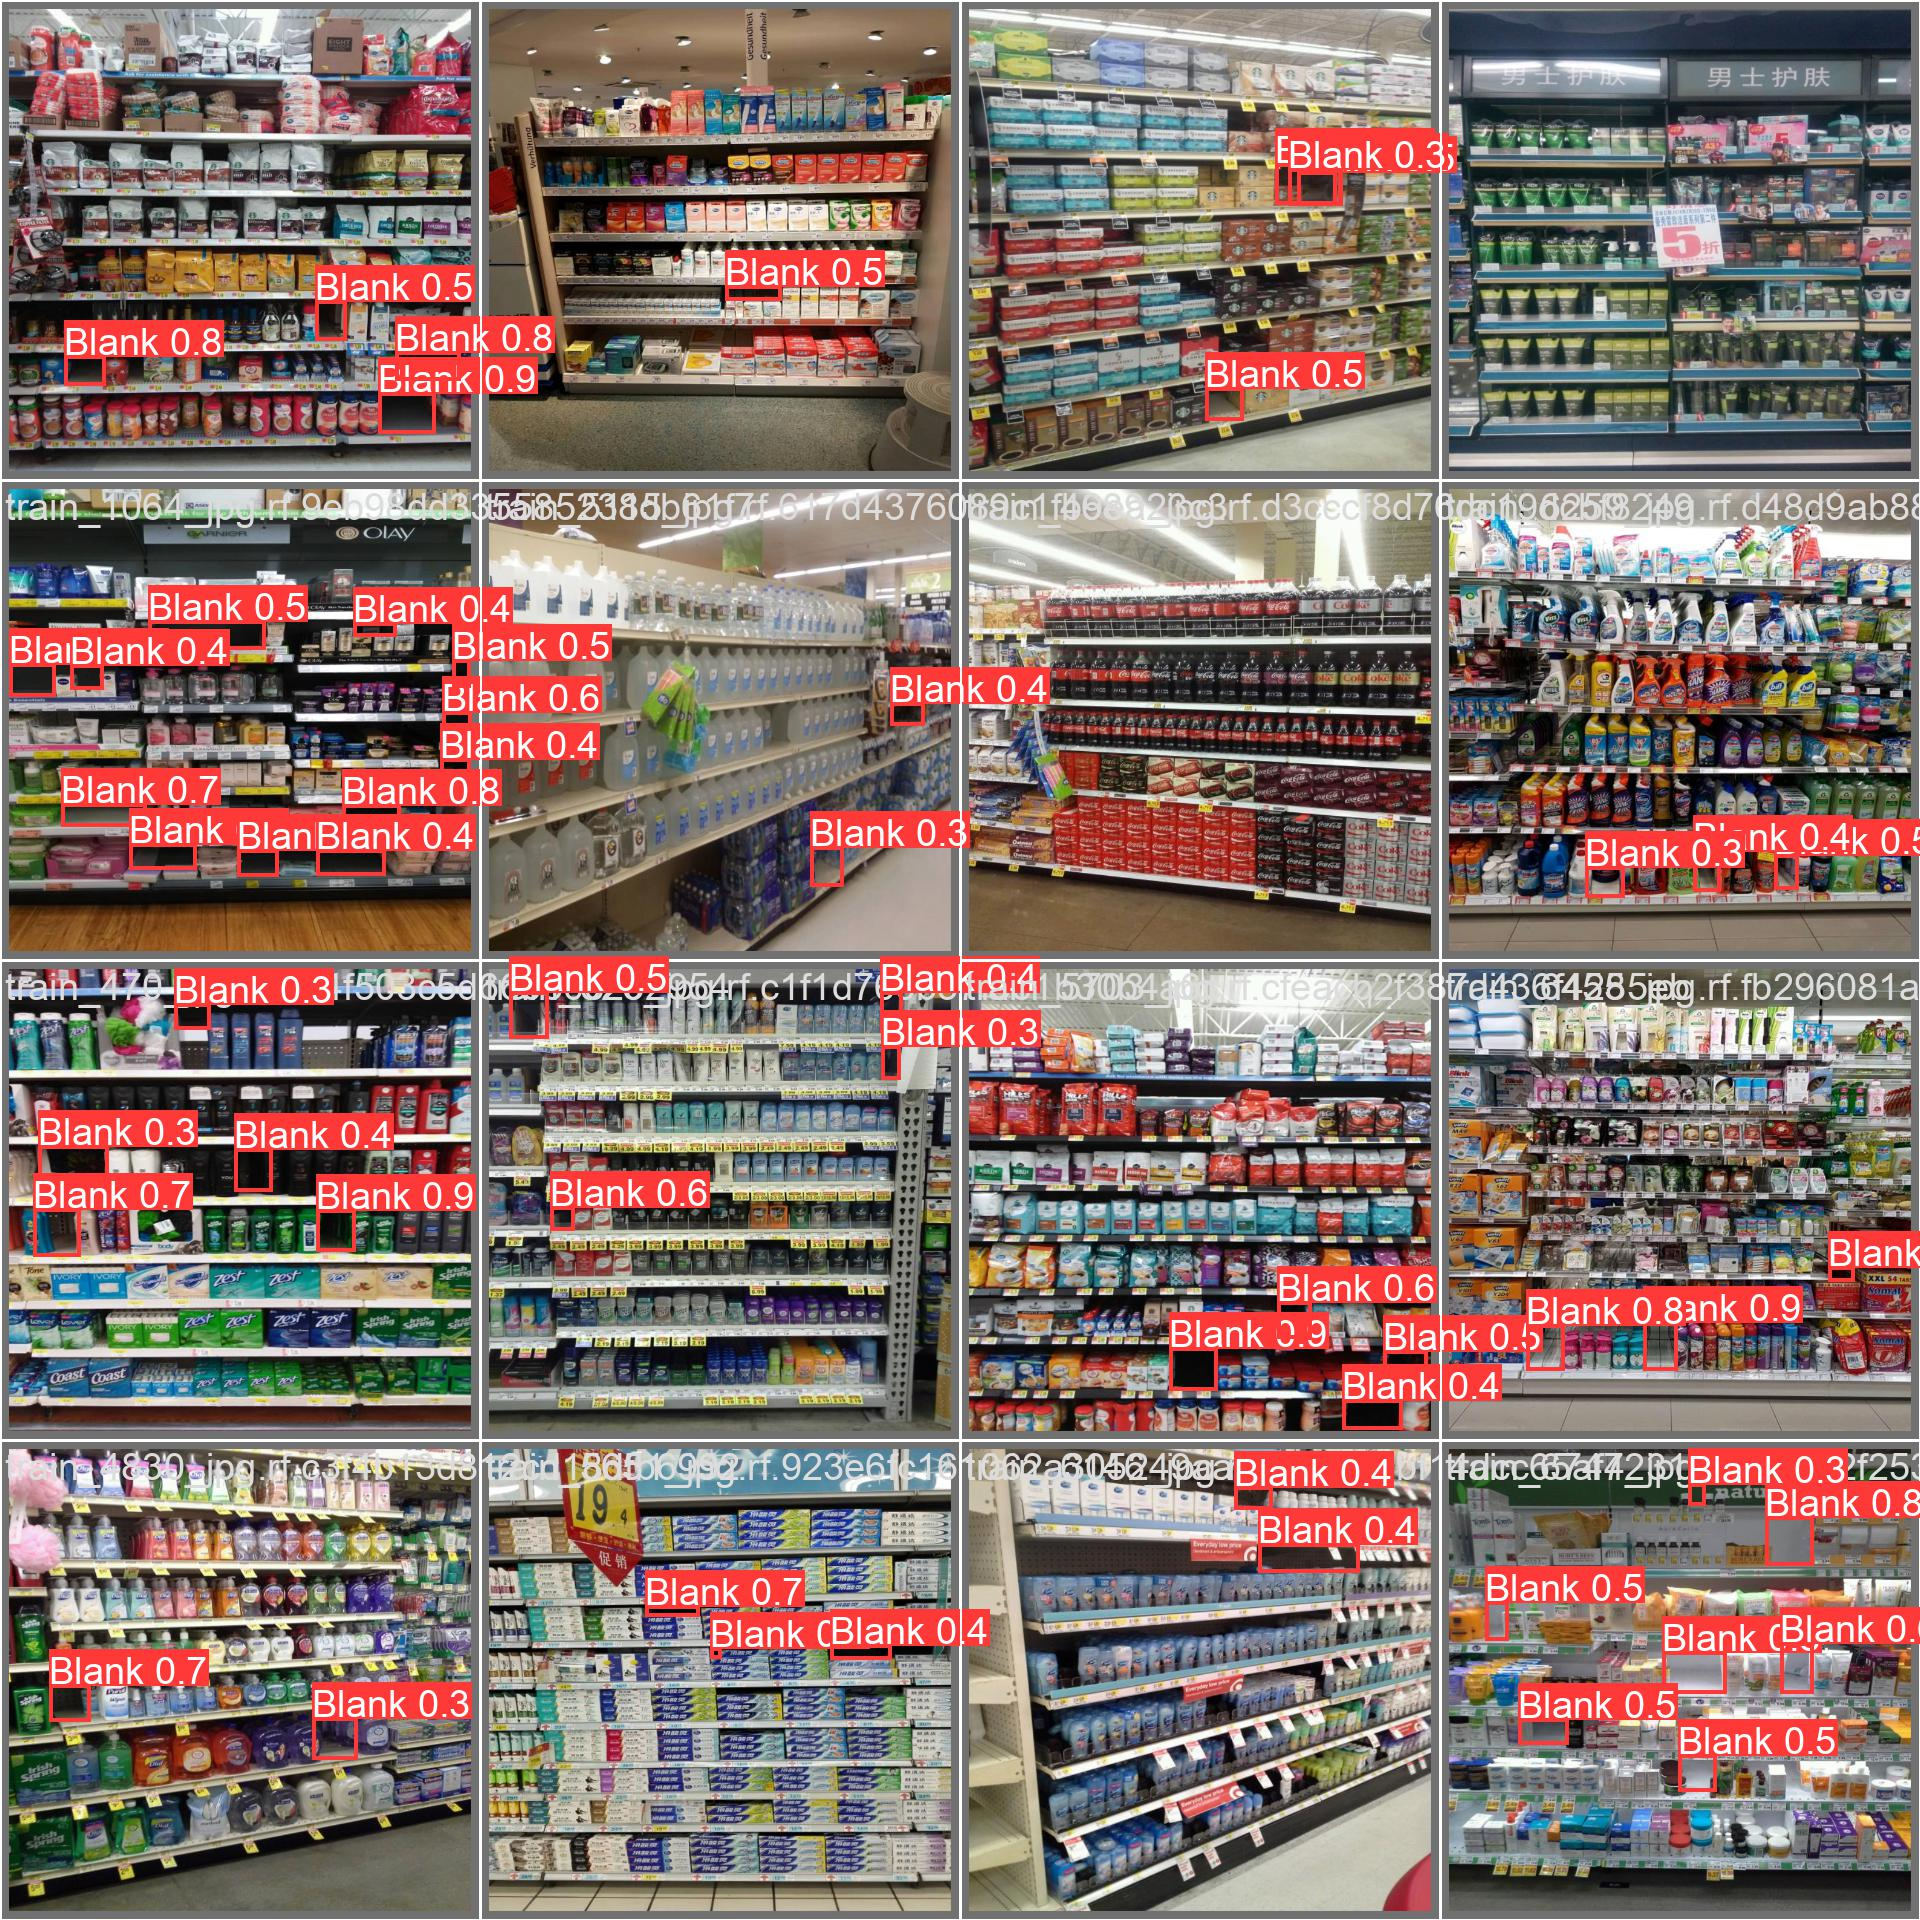

In [ ]:
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/datasets/runs/detect/train/val_batch0_pred.jpg', width=600)

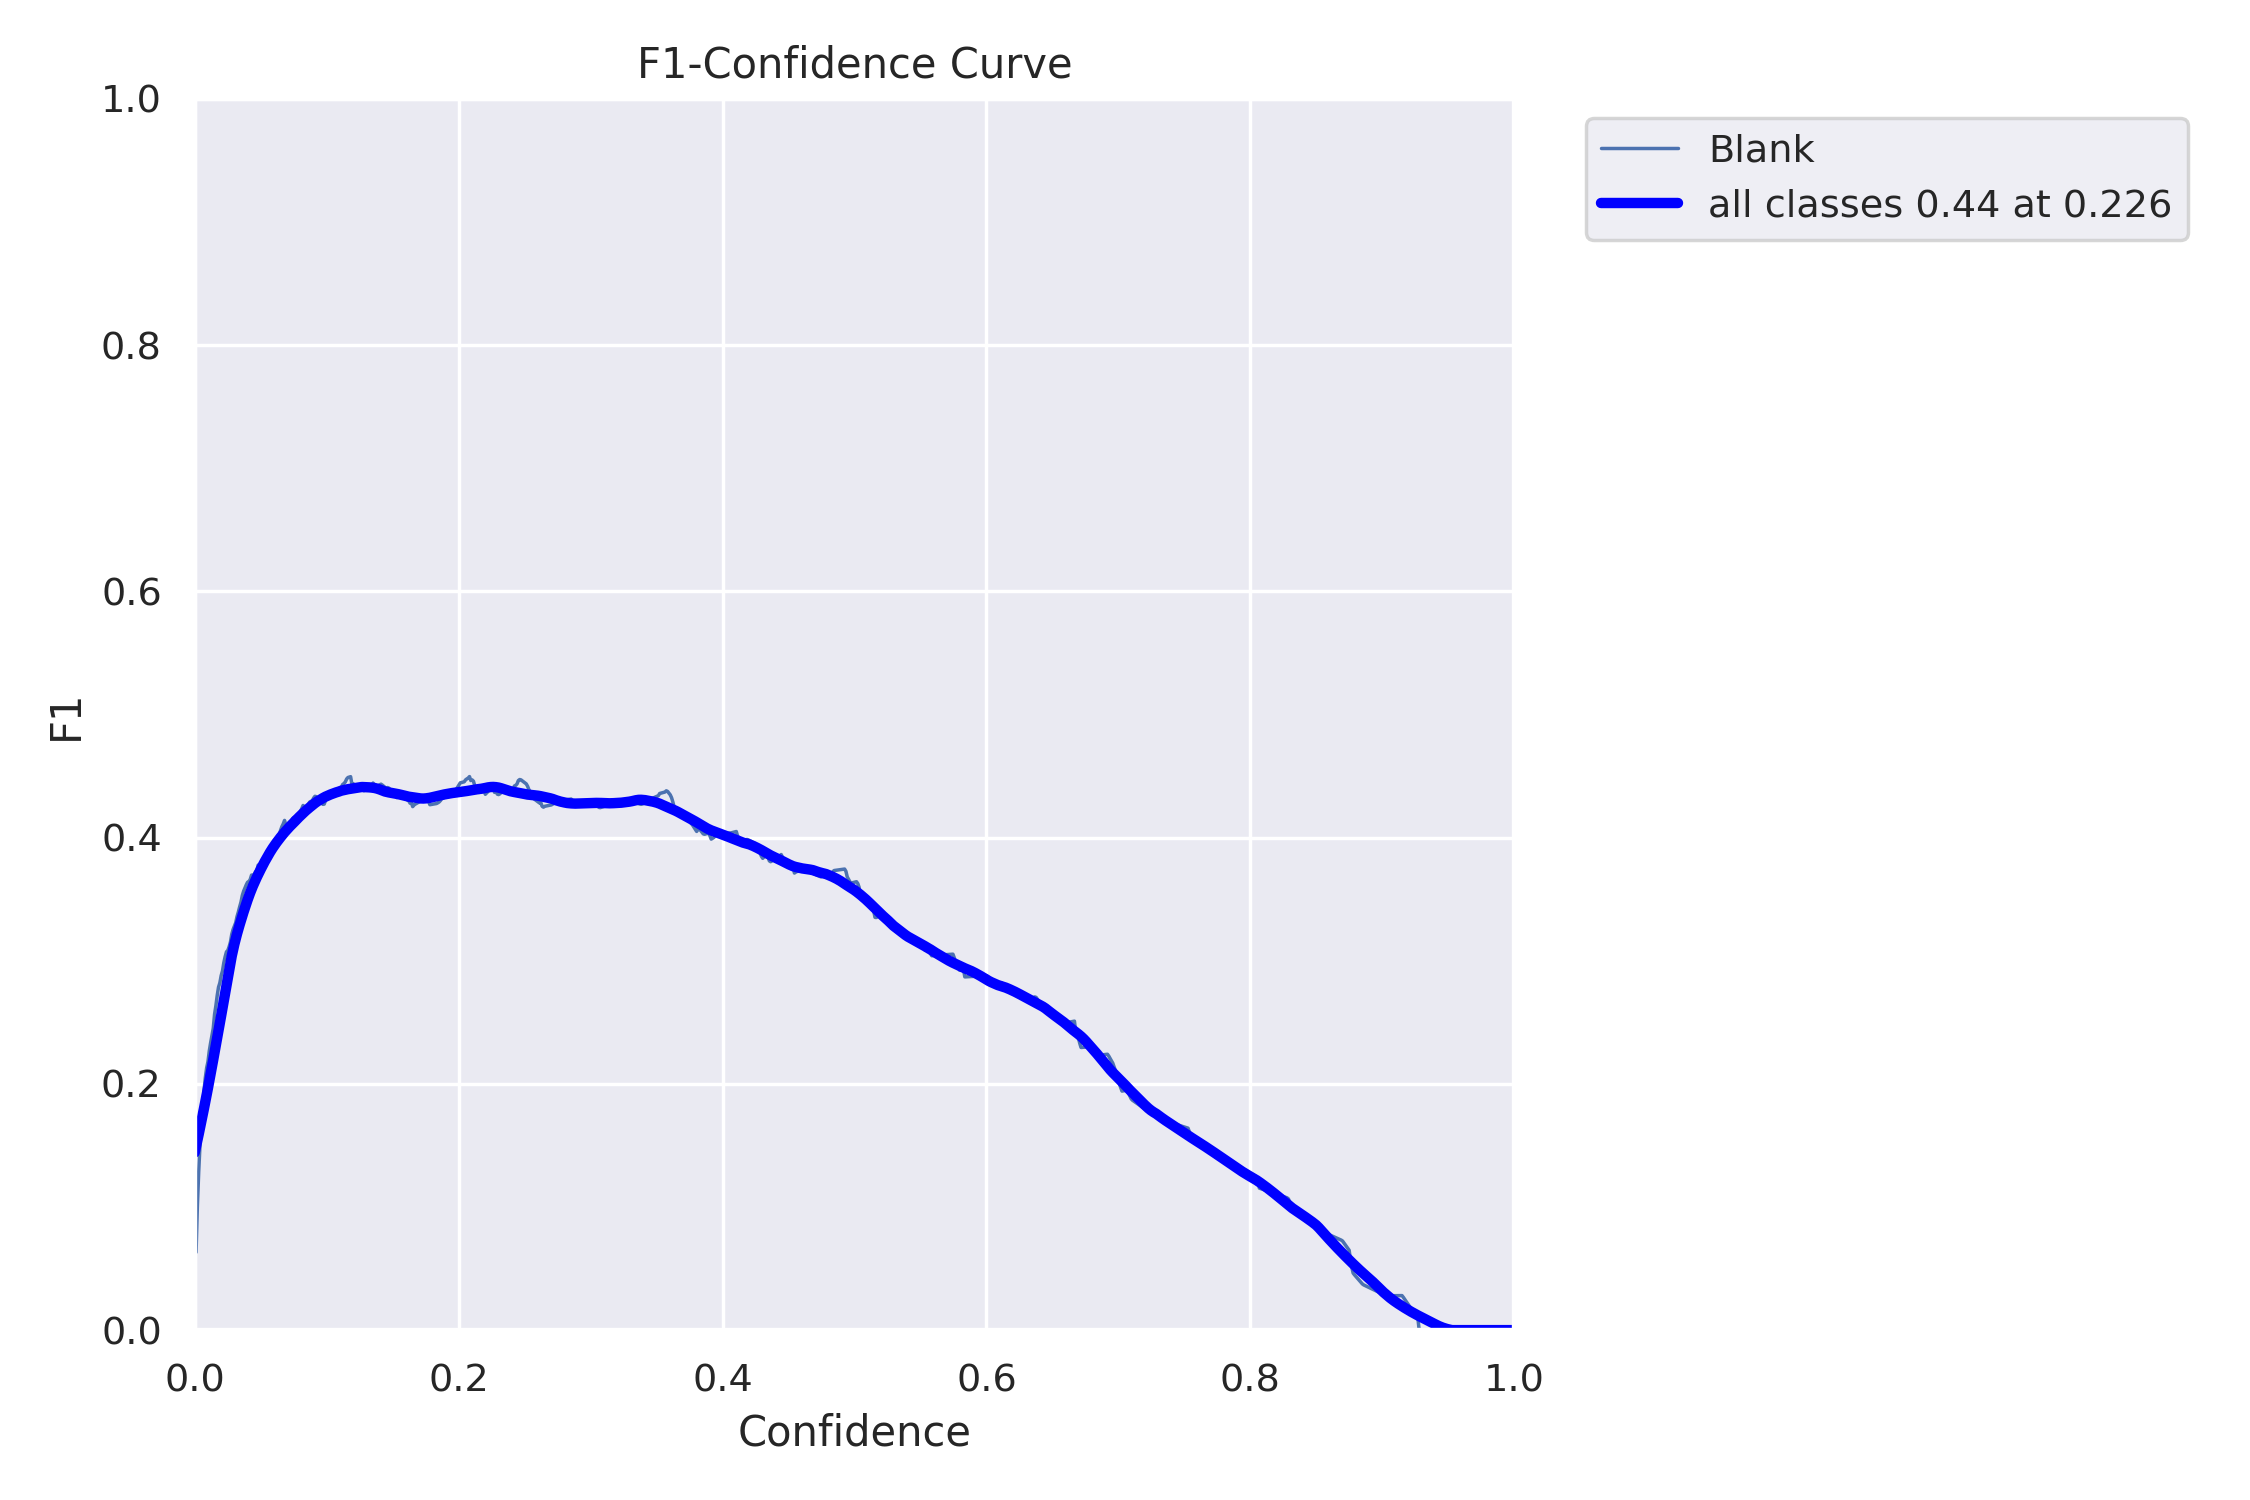

In [ ]:
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/datasets/runs/detect/train/F1_curve.png', width=600)

In [ ]:
#VALIDATION
%cd {working}

!yolo task=detect mode=val model={working}datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/Colab/YOLOv8
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab/YOLOv8/datasets/DETECTION_IDK_WHAT-3/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.17s/it]
                   all         40        211      0.468      0.422      0.404       0.14
Speed: 13.2ms pre-process, 16.1ms inference, 0.0ms loss, 2.5ms post-process per image


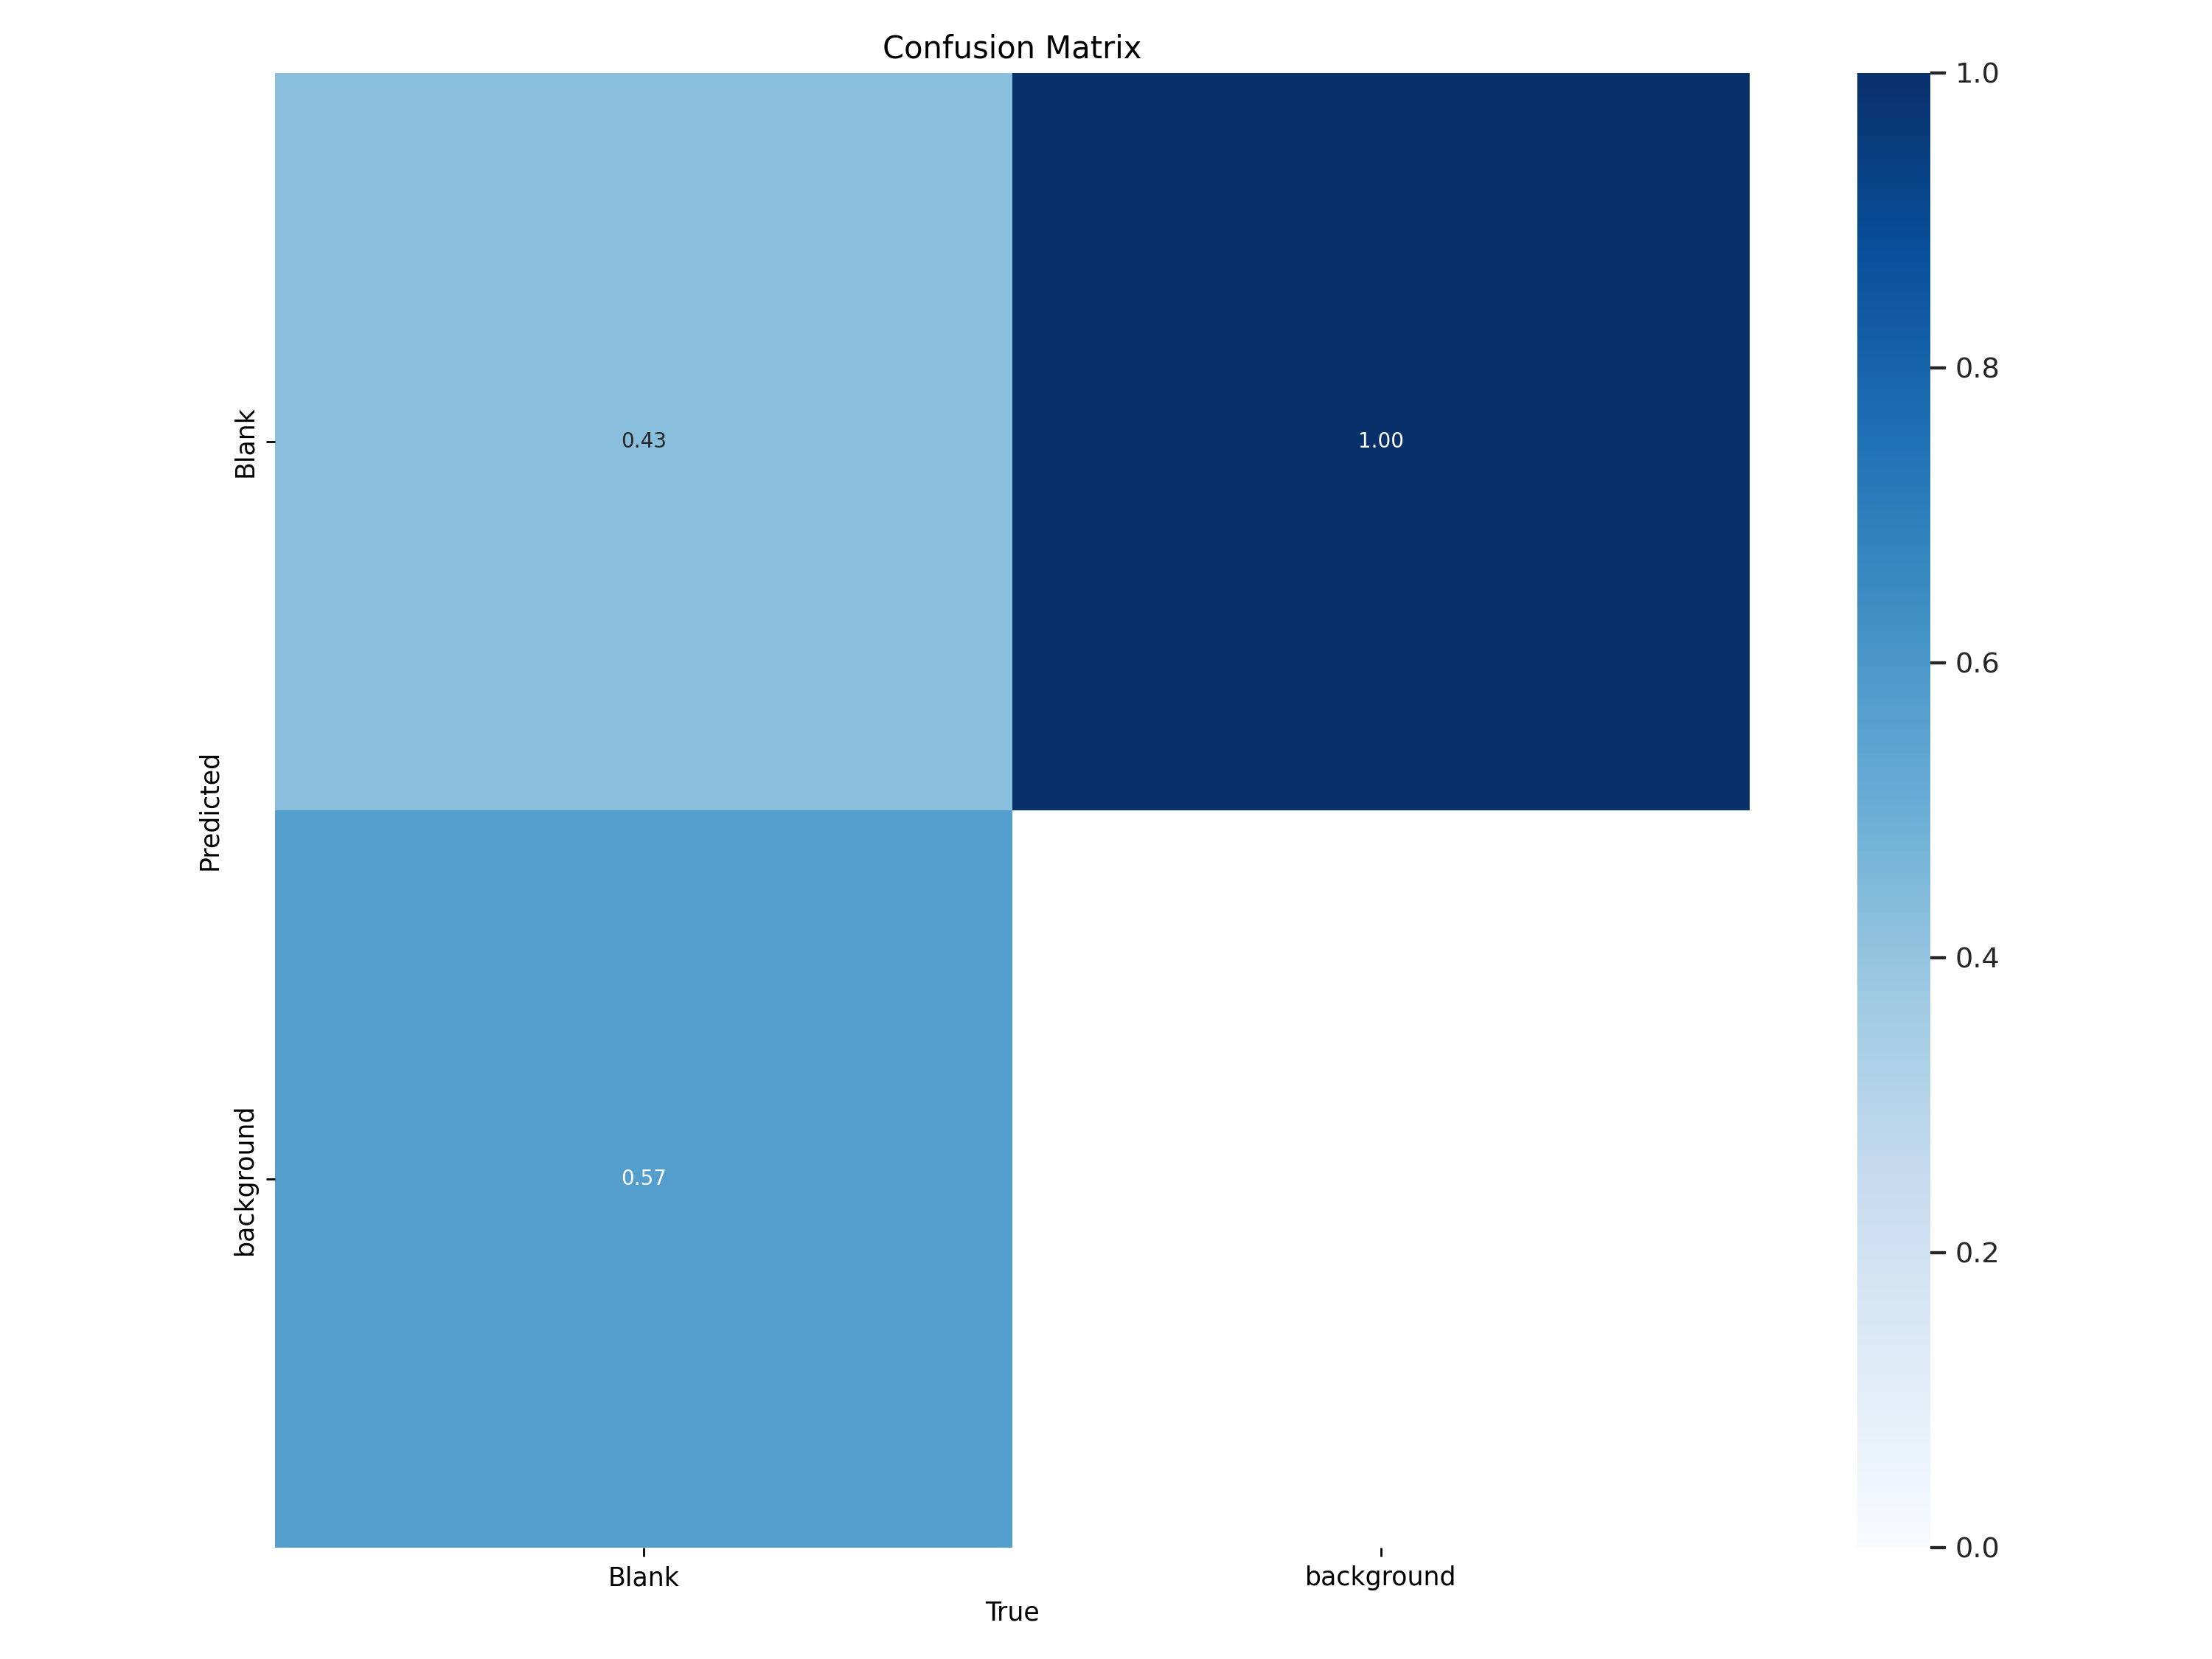

In [ ]:
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/runs/detect/val2/confusion_matrix.png',width=600)

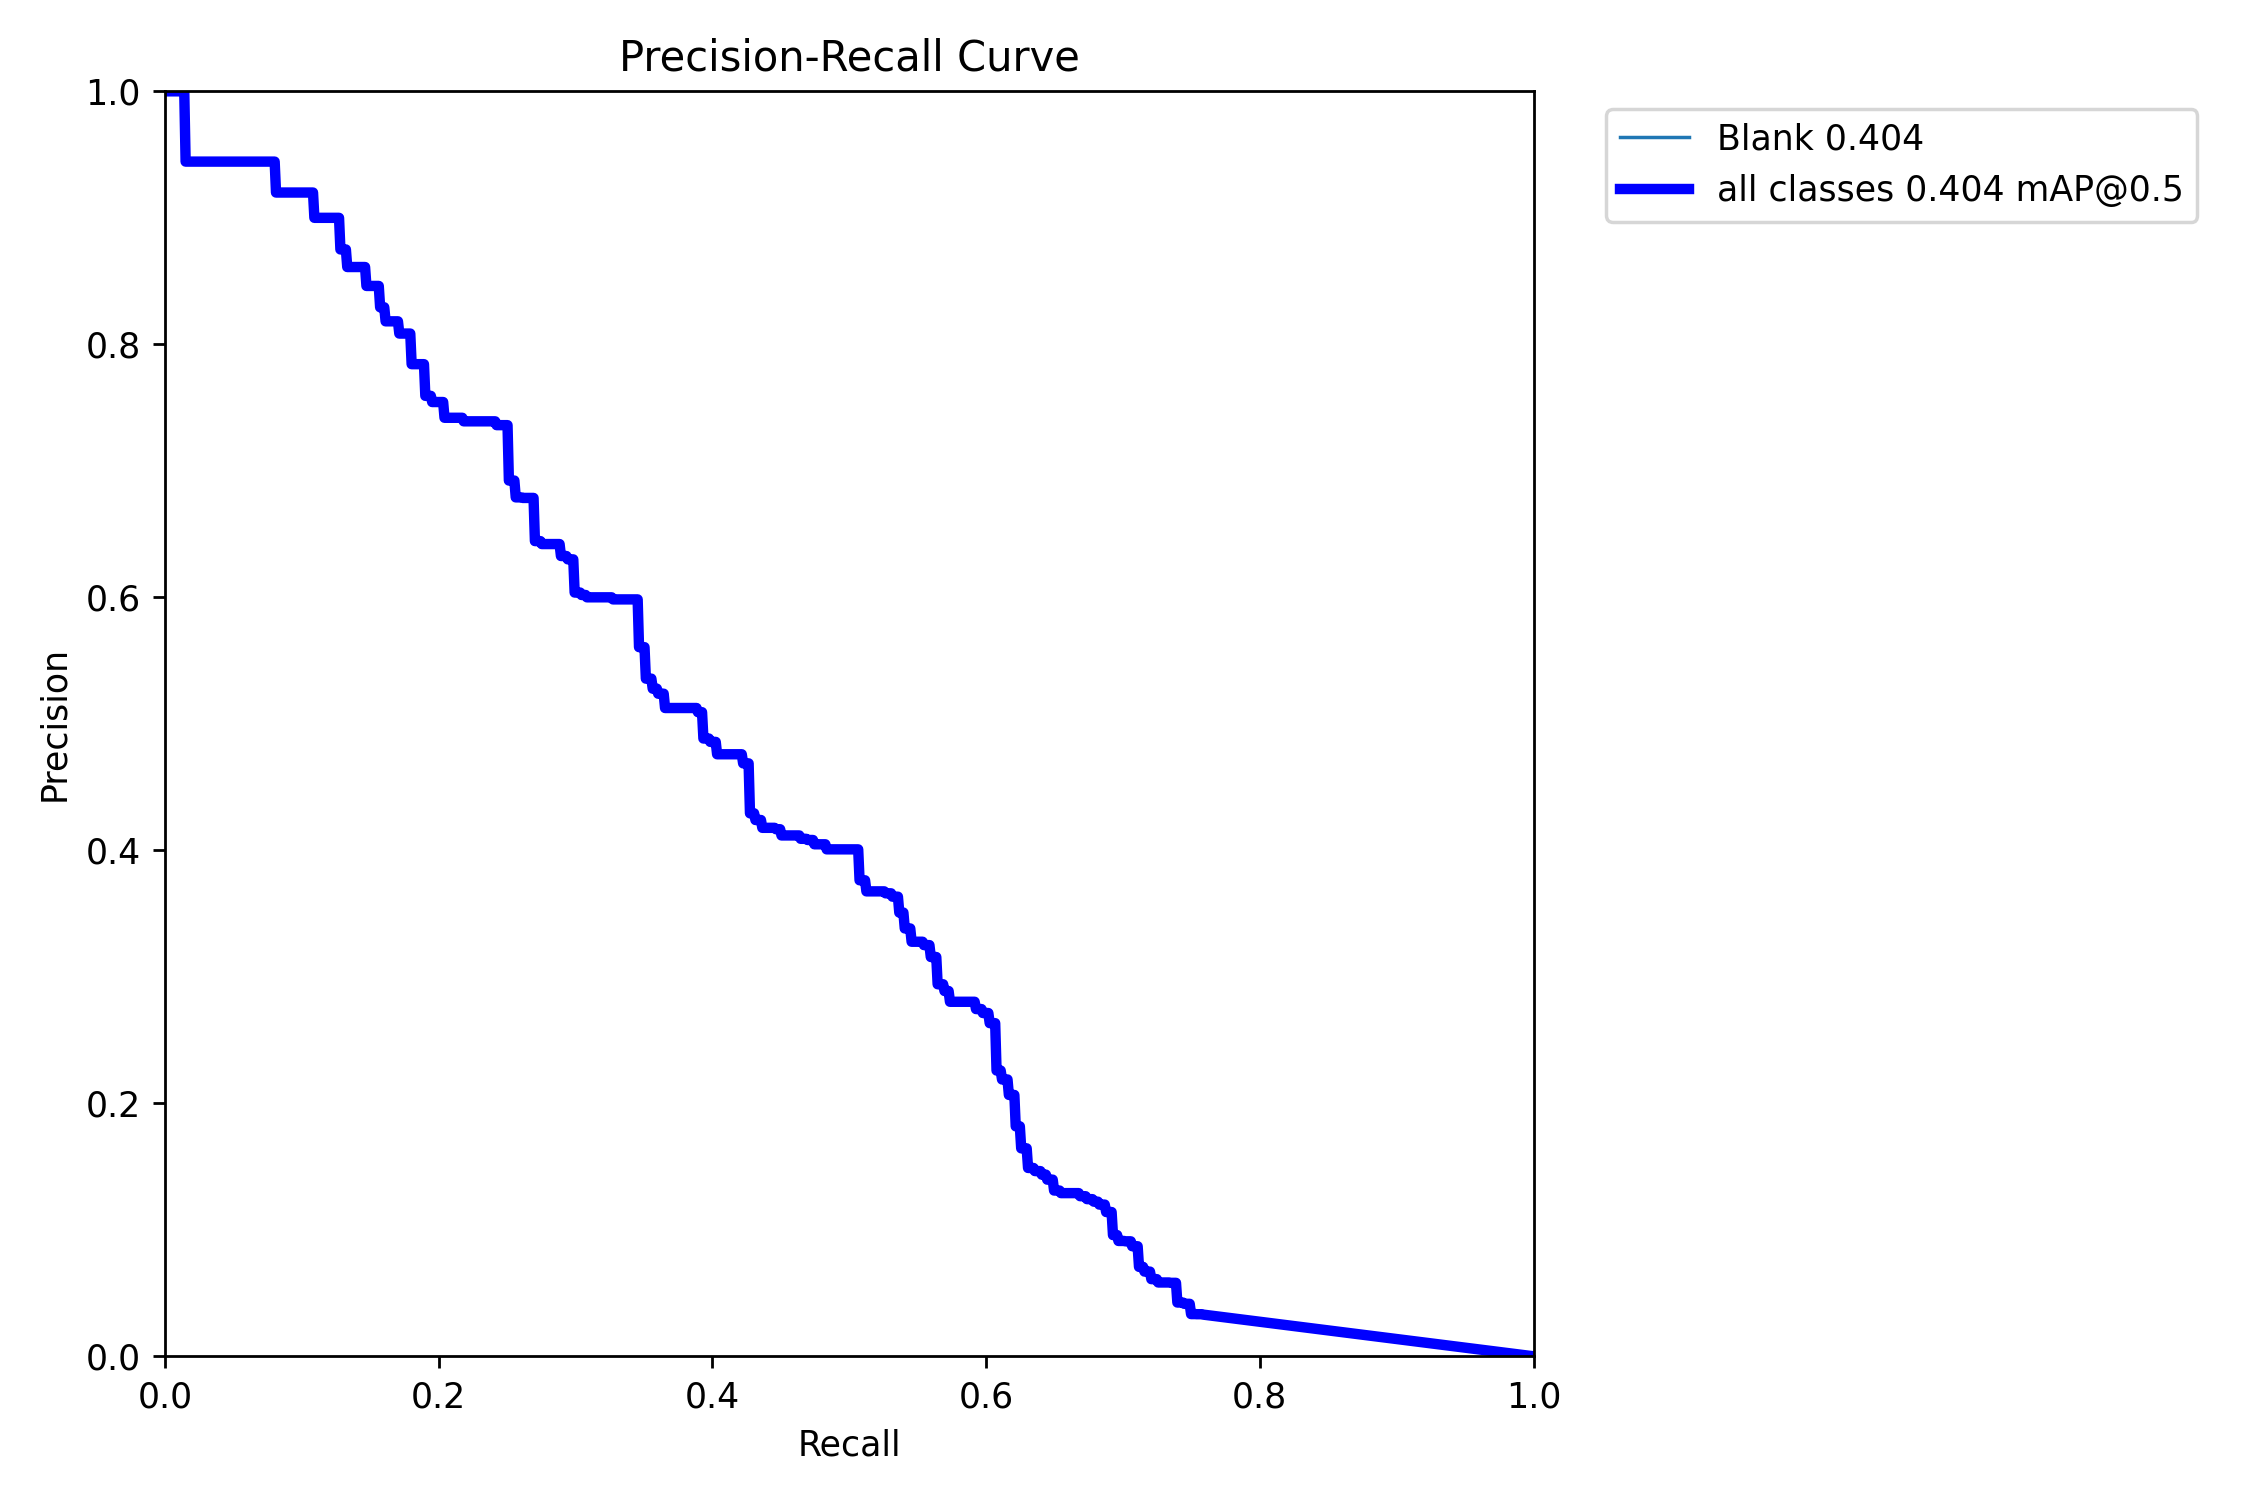

In [ ]:
Image(filename='/content/drive/MyDrive/Colab/YOLOv8/runs/detect/val2/PR_curve.png',width=600)

In [ ]:
#TESTING
%cd {working}
!yolo task=detect mode=predict model={working}datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/drive/MyDrive/Colab/YOLOv8
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/10 /content/drive/MyDrive/Colab/YOLOv8/datasets/DETECTION_IDK_WHAT-3/test/images/test_1000.jpg: 800x608 3 Blanks, 23.6ms
image 2/10 /content/drive/MyDrive/Colab/YOLOv8/datasets/DETECTION_IDK_WHAT-3/test/images/test_1001.jpg: 480x800 1 Blank, 17.3ms
image 3/10 /content/drive/MyDrive/Colab/YOLOv8/datasets/DETECTION_IDK_WHAT-3/test/images/test_1002.jpg: 800x608 4 Blanks, 20.3ms
image 4/10 /content/drive/MyDrive/Colab/YOLOv8/datasets/DETECTION_IDK_WHAT-3/test/images/test_1003.jpg: 800x608 19.7ms
image 5/10 /content/drive/MyDrive/Colab/YOLOv8/datasets/DETECTION_IDK_WHAT-3/test/images/test_1004.jpg: 800x448 2 Blanks, 17.1ms
image 6/10 /content/drive/MyDrive/Colab/YOLOv8/datasets/DETECTION_IDK_WHAT-3/test/images/test_1005.jpg: 608x800 4 Blanks, 19.4ms
image 7/10 /content/drive/MyDrive

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{working}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")